In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

<Axes: xlabel='car_ID', ylabel='price'>

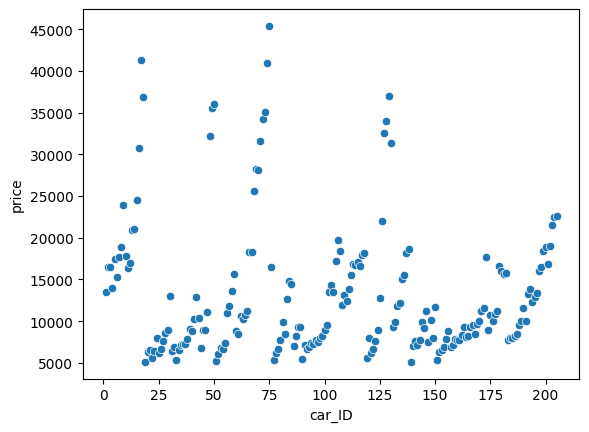

In [3]:
sns.scatterplot(x='car_ID', y='price', data=df)

<Axes: xlabel='symboling', ylabel='count'>

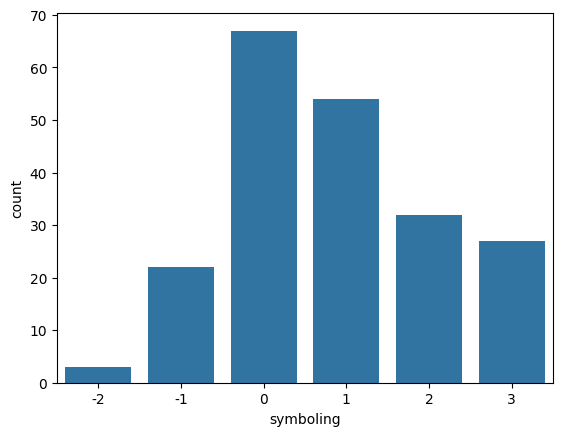

In [4]:
sns.countplot(x='symboling', data=df)

In [5]:
df.groupby('fueltype')['price'].count()

fueltype
diesel     20
gas       185
Name: price, dtype: int64

In [6]:
df['fueltype_encode'] = df['fueltype'].map({'gas': 0, 'diesel': 1})

<Axes: xlabel='fueltype_encode', ylabel='count'>

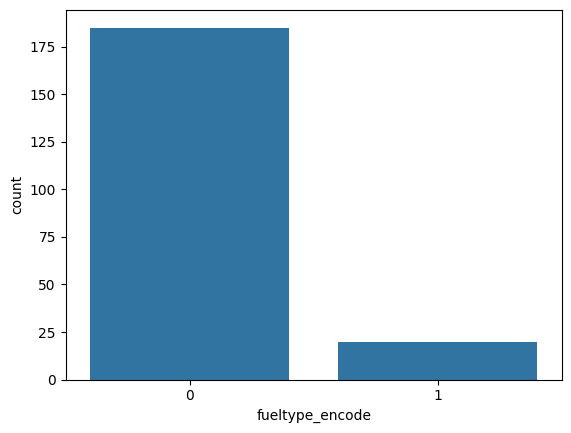

In [7]:
sns.countplot(x='fueltype_encode', data=df)

<Axes: xlabel='aspiration', ylabel='count'>

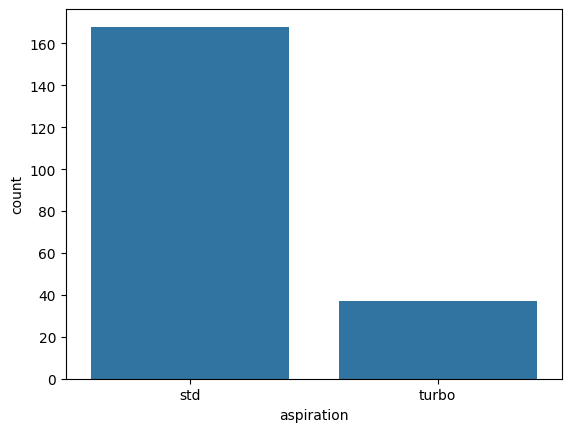

In [8]:
sns.countplot(x='aspiration', data=df)

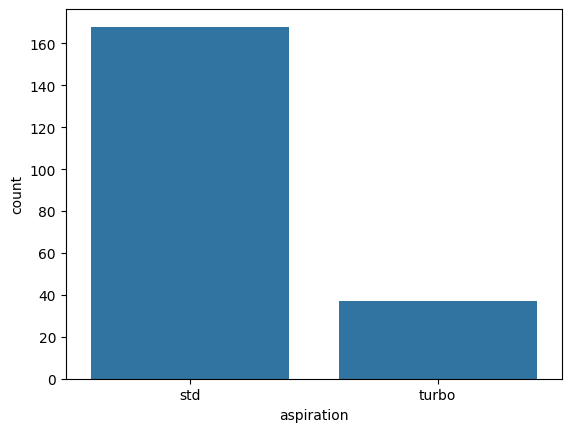

In [9]:
sns.countplot(x='aspiration', data=df)
df['aspiration_encode'] = df['aspiration'].map({'std': 0, 'turbo': 1})

<Axes: xlabel='aspiration_encode', ylabel='count'>

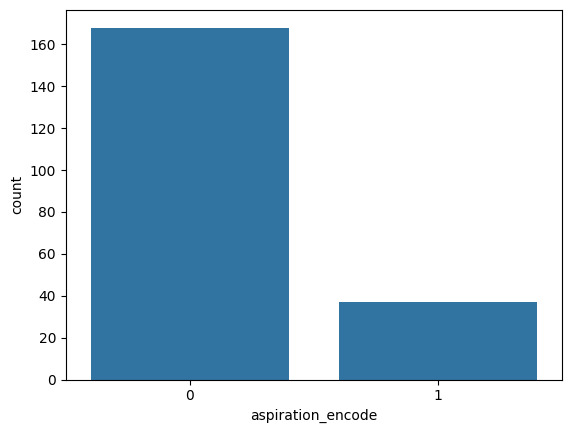

In [10]:
sns.countplot(x='aspiration_encode', data=df)

<Axes: xlabel='doornumber', ylabel='count'>

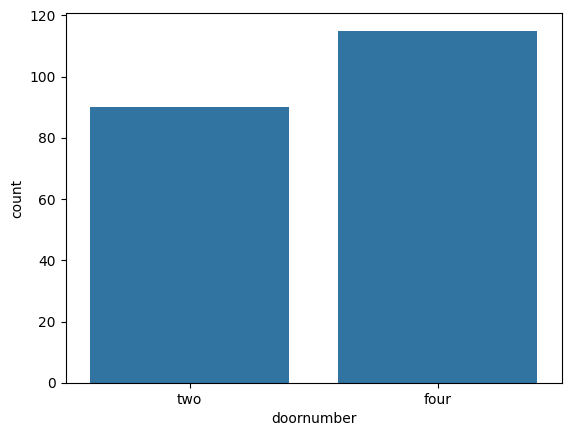

In [11]:

sns.countplot(x='doornumber', data=df)

In [12]:


df['doornumber_encode'] = df['doornumber'].map({'two': 2, 'four': 4})

<Axes: xlabel='doornumber_encode', ylabel='count'>

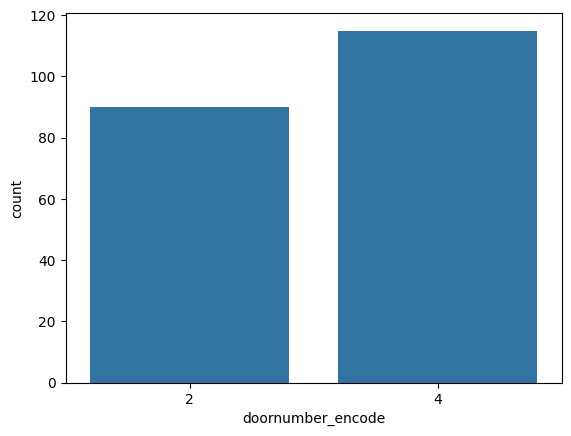

In [13]:
sns.countplot(x='doornumber_encode', data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_ID             205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   CarName            205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   doornumber         205 non-null    object 
 6   carbody            205 non-null    object 
 7   drivewheel         205 non-null    object 
 8   enginelocation     205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  carlength          205 non-null    float64
 11  carwidth           205 non-null    float64
 12  carheight          205 non-null    float64
 13  curbweight         205 non-null    int64  
 14  enginetype         205 non-null    object 
 15  cylindernumber     205 non-null    object 
 16  enginesize         205 non

<Axes: xlabel='carbody', ylabel='count'>

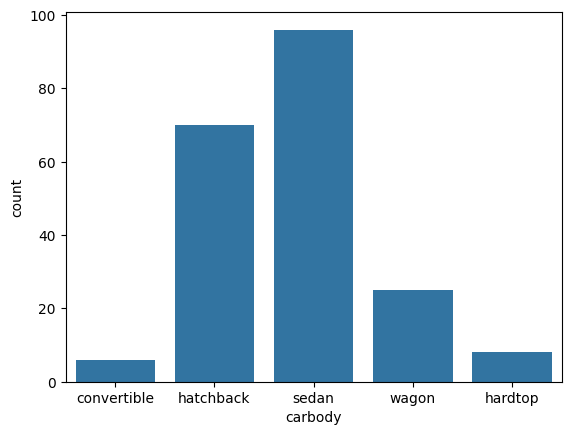

In [15]:
sns.countplot(x='carbody', data=df)

<Axes: xlabel='carbody', ylabel='Count'>

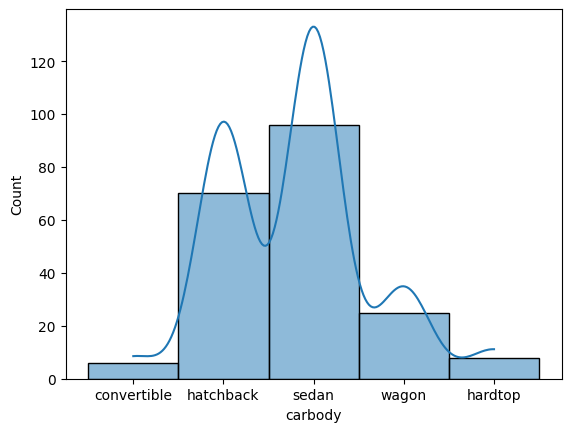

In [16]:
sns.histplot(df['carbody'], bins='auto',kde=True)

In [17]:
df['carbody'].unique()



array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
carbody_encoded = encoder.fit_transform(df[['carbody']])
carbody_encoded_df = pd.DataFrame(carbody_encoded, columns=encoder.get_feature_names_out(['carbody']))


In [20]:
df = pd.concat([df.drop(columns=['carbody']), carbody_encoded_df], axis=1)

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   aspiration           205 non-null    object 
 5   doornumber           205 non-null    object 
 6   drivewheel           205 non-null    object 
 7   enginelocation       205 non-null    object 
 8   wheelbase            205 non-null    float64
 9   carlength            205 non-null    float64
 10  carwidth             205 non-null    float64
 11  carheight            205 non-null    float64
 12  curbweight           205 non-null    int64  
 13  enginetype           205 non-null    object 
 14  cylindernumber       205 non-null    object 
 15  enginesize           205 non-null    int

<Axes: xlabel='enginetype', ylabel='count'>

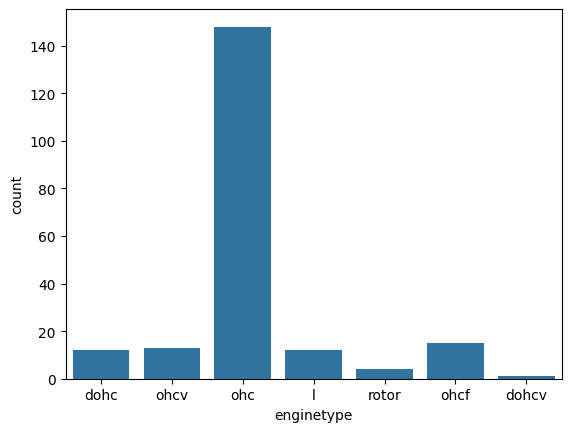

In [25]:
sns.countplot(x='enginetype', data=df)

In [26]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [27]:
engine_encoder = OneHotEncoder(sparse_output=False)
enginetype_encoded = engine_encoder.fit_transform(df[['enginetype']])
enginetype_encoded_df = pd.DataFrame(enginetype_encoded, columns=engine_encoder.get_feature_names_out(['enginetype']))

In [28]:
enginetype_encoded_df.head()

,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
df = pd.concat([df.drop(columns=['enginetype']), enginetype_encoded_df], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   aspiration           205 non-null    object 
 5   doornumber           205 non-null    object 
 6   drivewheel           205 non-null    object 
 7   enginelocation       205 non-null    object 
 8   wheelbase            205 non-null    float64
 9   carlength            205 non-null    float64
 10  carwidth             205 non-null    float64
 11  carheight            205 non-null    float64
 12  curbweight           205 non-null    int64  
 13  cylindernumber       205 non-null    object 
 14  enginesize           205 non-null    int64  
 15  fuelsystem           205 non-null    obj

<Axes: xlabel='doornumber', ylabel='count'>

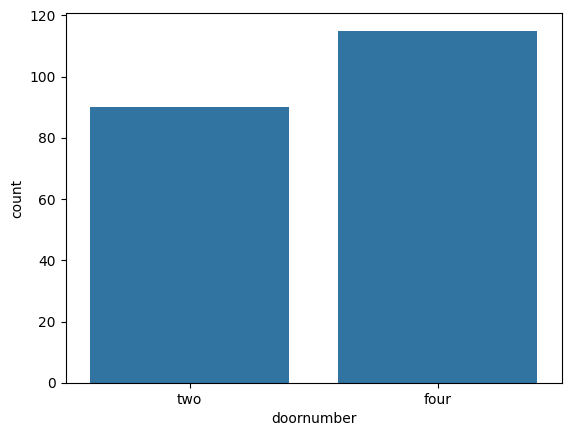

In [31]:
sns.countplot(x='doornumber', data=df)

<Axes: xlabel='doornumber', ylabel='price'>

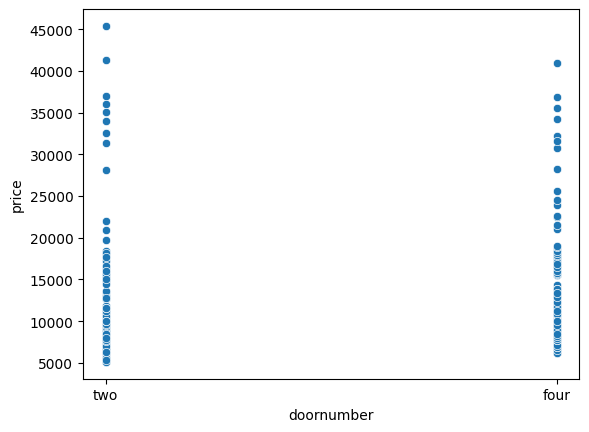

In [32]:
sns.scatterplot(x='doornumber', y='price', data=df)

In [33]:
df['doornumber_encode'] = df['doornumber'].map({'two': 2, 'four': 4})

<Axes: xlabel='doornumber_encode', ylabel='Count'>

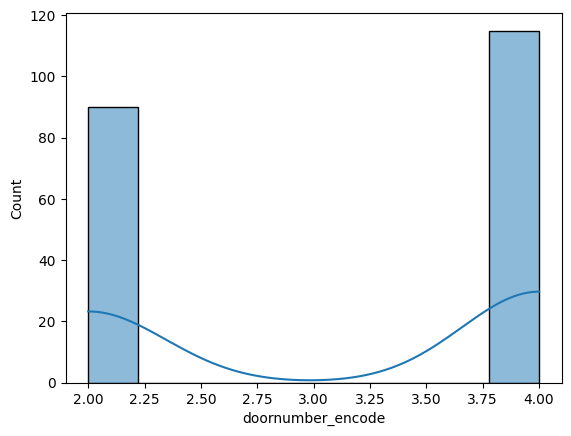

In [34]:
sns.histplot(df['doornumber_encode'], bins='auto',kde=True)

2025-11-20 15:02:51.005 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2025-11-20 15:02:51.024 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.0)
2025-11-20 15:02:51.036 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.0)
2025-11-20 15:02:51.045 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.0)
2025-11-20 15:02:51.050 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2025-11-20 15:02:51.140 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.0)
2025-11-20 15:02:51.157 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted pearson3 distribution with error=0.0)
2025-11-20 15:02:51.201 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted triang distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.662565e-08,2316.431151,2326.400181,inf,0.052692,0.600738
beta,4.023666e-08,2369.796714,2383.088754,inf,0.067820,0.289146
gamma,4.189945e-08,2310.349985,2320.319015,inf,0.059106,0.453746
pearson3,4.189945e-08,2310.349979,2320.319009,inf,0.059106,0.453746
expon,4.624151e-08,2299.098263,2305.744283,inf,0.075596,0.182409


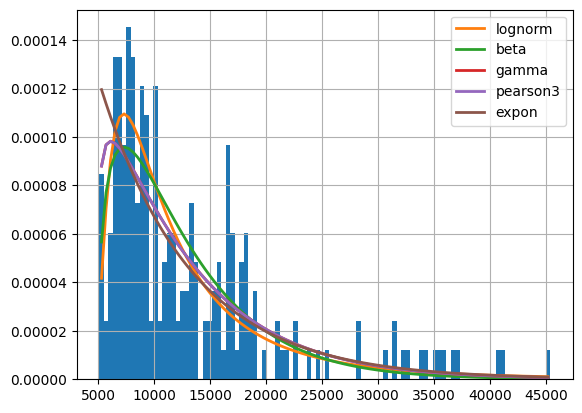

In [38]:
from fitter import Fitter
f = Fitter(df['price'],distributions=['norm', 'lognorm', 'expon', 'gamma', 'beta', 'pearson3', 'triang', 'uniform'])
f.fit()
f.summary()

In [37]:
print("Best:", f.get_best())

Best: {'beta': {'a': 1.8169631649377873, 'b': 0.21708720600784162, 'loc': 1.6967480678539517, 'scale': 2.3032519321460487}}
